In [1]:
import pandas as pd
import plotly.graph_objects as go
from scipy.cluster.hierarchy import  dendrogram,linkage
from scipy.cluster import hierarchy
import matplotlib.pyplot as plt
from scipy.spatial.distance import hamming
from scipy.spatial.distance import pdist
import numpy as np

In [2]:
df = pd.read_csv('data/dataframe_test.csv')
print(df.head())

   id  month care_status  sex  age  education  wealth  distance_clinic
0   3    0.0           D  1.0  1.0        2.0     2.0              1.0
1   3    1.0           D  1.0  1.0        2.0     2.0              1.0
2   3    2.0           D  1.0  1.0        2.0     2.0              1.0
3   3    3.0           D  1.0  1.0        2.0     2.0              1.0
4   3    4.0           D  1.0  1.0        2.0     2.0              1.0


id = "Identifiant Patient",
month = "Mois depuis la diagnostic",

care_status = "Statut dans les soins",

wealth = "Niveau de richesse",

distance_clinic = "Distance à la clinique la plus proche"

In [3]:
events= list(df["care_status"].unique())
events

['D', 'T', 'C', 'S']

  "diagnostiqué, mais pas suivi" = "D",
  "suivi, mais pas sous traitement" = "C",
  "sous traitement, mais infection non contrôlée" = "T",
  "sous traitement et infection contrôlée" = "S"

les données sont en forme longues 

In [4]:
# Sélectionner les colonnes id, month et care_status
selected_cols = df[['id', 'month', 'care_status']]
# Pivoter les données
pivoted_data = selected_cols.pivot(index='id', columns='month', values='care_status')
# Renommer les colonnes avec un préfixe "m"
pivoted_data.columns = ['m' + str(col) for col in pivoted_data.columns]

pivoted_data

,m0.0,m1.0,m2.0,m3.0,m4.0,m5.0,m6.0,m7.0,m8.0,m9.0,...,m41.0,m42.0,m43.0,m44.0,m45.0,m46.0,m47.0,m48.0,m49.0,m50.0
id,,,,,,,,,,,,,,,,,,,,,
3,D,D,D,D,D,D,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9,D,D,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
13,D,D,D,D,D,D,D,D,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
15,D,D,D,D,T,T,T,C,D,D,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
18,D,D,S,S,S,S,S,S,S,S,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9986,D,D,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9988,D,C,C,T,T,T,T,T,T,T,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9989,D,C,T,T,S,S,S,S,S,S,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [5]:
# Define colors for treatments
colors = ['red', 'blue', 'green', 'yellow']

# Create a figure
fig = go.Figure()

# Iterate over treatments
for treatment, color in zip(events, colors):
    # Extract data for the current treatment
    treatment_data = pivoted_data[pivoted_data.eq(treatment).any(axis=1)]
    # Get the columns representing months
    months = treatment_data.columns
    # Calculate the percentage of patients under the current treatment for each month
    percentages = (treatment_data.apply(lambda x: x.value_counts().get(treatment, 0)) / len(treatment_data)) * 100
    # Plot the curve for the percentage of patients under the treatment over time
    fig.add_trace(go.Scatter(x=months, y=percentages, mode='lines', name=treatment, line=dict(color=color)))

# Update layout
fig.update_layout(
    title='Percentage of Patients under Each Treatment Over Time',
    xaxis_title='Time',
    yaxis_title='Percentage of Patients',
    legend_title='Treatment',
    yaxis=dict(tickformat=".2f")
)

# Display the graph
fig.show()

In [6]:
drug_mapping = {"D":2, "C":4, "T":6, "S":8}
df_subsets_numeriques = pivoted_data.replace(drug_mapping)
df_subsets_numeriques

,m0.0,m1.0,m2.0,m3.0,m4.0,m5.0,m6.0,m7.0,m8.0,m9.0,...,m41.0,m42.0,m43.0,m44.0,m45.0,m46.0,m47.0,m48.0,m49.0,m50.0
id,,,,,,,,,,,,,,,,,,,,,
3,2,2.0,2.0,2.0,2.0,2.0,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9,2,2.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
13,2,2.0,2.0,2.0,2.0,2.0,2.0,2.0,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
15,2,2.0,2.0,2.0,6.0,6.0,6.0,4.0,2.0,2.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
18,2,2.0,8.0,8.0,8.0,8.0,8.0,8.0,8.0,8.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9986,2,2.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9988,2,4.0,4.0,6.0,6.0,6.0,6.0,6.0,6.0,6.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9989,2,4.0,6.0,6.0,8.0,8.0,8.0,8.0,8.0,8.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


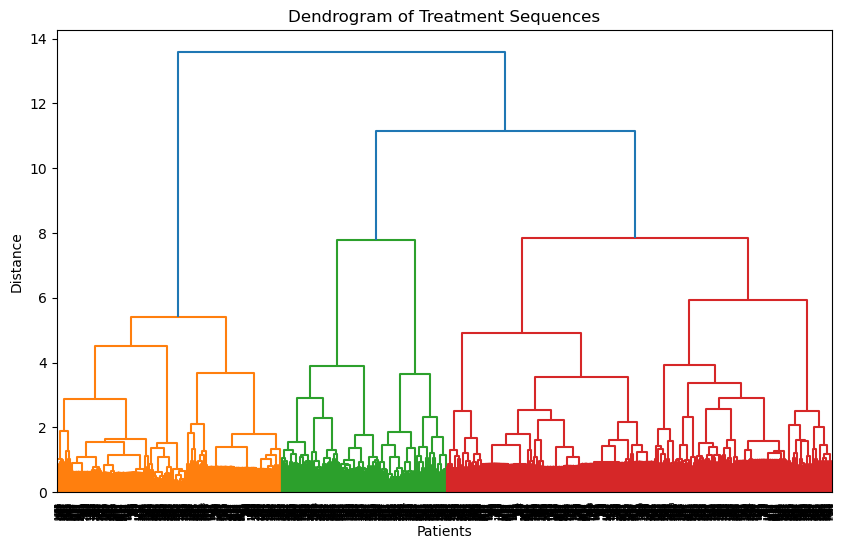

In [9]:
data_array = df_subsets_numeriques.to_numpy()
distance_matrix = pdist(data_array, 'matching')    
linkage_matrix = linkage(distance_matrix, method='ward',optimal_ordering=True)
plt.figure(figsize=(10, 6))
dendrogram(linkage_matrix)
plt.title('Dendrogram of Treatment Sequences')
plt.xlabel('Patients')
plt.ylabel('Distance')
plt.show()

In [10]:
leaves_order= list(hierarchy.leaves_list(linkage_matrix))
data_array = data_array[leaves_order]
colors = ['blue', 'orange', 'green', 'red']
heatmap = go.Heatmap(z=data_array,colorscale= 'viridis')

# Créer une figure
fig = go.Figure(data=heatmap)
fig.update_layout(
    title='TAK ',
    xaxis_title='Temps',
    yaxis_title='Patients',
)

# Afficher le graphique
fig.show()

In [14]:
def modal_filter(data, kernel_size):
    filtered_data = np.full_like(data, np.nan)
    kernel_rows, kernel_cols = kernel_size
    
    for i in range(len(data)):
        row_min = max(0, i - kernel_rows // 2)
        row_max = min(len(data), i + kernel_rows // 2 + 1)
        for j in range(len(data[i])):
            col_min = max(0, j - kernel_cols // 2)
            col_max = min(len(data[i]), j + kernel_cols // 2 + 1)
            kernel_values = data[row_min:row_max, col_min:col_max].flatten()
            # Filter out negative values and NaN
            kernel_values = kernel_values[~np.isnan(kernel_values)]
            if len(kernel_values) > 0:
                # Convert kernel_values to integers
                kernel_values_int = kernel_values.astype(int)
                most_frequent_value = np.argmax(np.bincount(kernel_values_int))
                filtered_data[i, j] = most_frequent_value
    
    return filtered_data


filtered_data_opt = modal_filter(data_array, (20, 10))